### **1. Descriptor calculation**

 1.1 Install PADELpy

 1.2 Import dataset

 1.3 Descriptor calculation

 1.4 Define X, Y

### **2. Random forest modeling and validation**

 2.1 Data splitting

 2.2 Random forest modeling

 2.3 Random forest internal validation

 2.4 Random forest external validation

 2.5 Y-randomization

### **3. Feature importance**

3.1 Random forest intrinsic feature importance

3.2 Permutation importance

3.3 Shap explainer 


**1.1 Install PADELpy**

In [6]:
! pip install padelpy

     |████████████████████████████████| 20.9 MB 5.3 MB/s 


In [7]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2021-11-19 03:52:49--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2021-11-19 03:52:49--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2021-11-19 03:52:49 (74.2 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xm

In [8]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [9]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [10]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

**1.2 Import dataset**

In [3]:
#import csv file
import pandas as pd

df = pd.read_csv('https://github.com/GeorgeYuriCADD/IC50-dataset/raw/main/NDM478concise.csv')
df

,ID,pIC50,activity,Canonical SMILES
0,lit1,1.41,inactive,OC(=O)CO/N=C(/c1csc(n1)N)\C(=O)N[C@@H]1C(=O)N(...
1,lit2,1.96,inactive,CCC(C(C)C)C=CC(C1CCC2C1(C)CCC1C2CC=C2C1(C)CCC(...
2,lit3,1.99,inactive,O=C(C(c1ccccc1)C(=O)O)N[C@@H]1C(=O)N2[C@@H]1SC...
3,lit4,2.32,inactive,O[C@H]1CC[C@]2([C@H](C1(C)C)CC[C@@]1([C@@H]2CC...
4,CHEMBL1379384,2.51,inactive,CCCc1ccc(cc1)C(=O)CCC(=O)O
...,...,...,...,...
473,lit322,5.94,intermediate,SCc1cc(ccc1C(=O)O)c1cccc(c1Cl)Cl
474,lit323,5.95,intermediate,OC(=O)c1ccc(cc1)N1C(=O)S/C(=C\c2ccccn2)/C1=O
475,lit324,5.96,intermediate,O=C(Nc1nc2c([nH]1)cc(cc2)[N+](=O)[O-])CSc1nnc(...
476,lit325,5.98,intermediate,O=c1n(CCCc2ccccc2)sc2c1cccc2


In [11]:
#create smi file for descriptor calculation
df2 = pd.concat( [df['Canonical SMILES'],df['ID']], axis=1 )
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)
df2

,Canonical SMILES,ID
0,OC(=O)CO/N=C(/c1csc(n1)N)\C(=O)N[C@@H]1C(=O)N(...,lit1
1,CCC(C(C)C)C=CC(C1CCC2C1(C)CCC1C2CC=C2C1(C)CCC(...,lit2
2,O=C(C(c1ccccc1)C(=O)O)N[C@@H]1C(=O)N2[C@@H]1SC...,lit3
3,O[C@H]1CC[C@]2([C@H](C1(C)C)CC[C@@]1([C@@H]2CC...,lit4
4,CCCc1ccc(cc1)C(=O)CCC(=O)O,CHEMBL1379384
...,...,...
473,SCc1cc(ccc1C(=O)O)c1cccc(c1Cl)Cl,lit322
474,OC(=O)c1ccc(cc1)N1C(=O)S/C(=C\c2ccccn2)/C1=O,lit323
475,O=C(Nc1nc2c([nH]1)cc(cc2)[N+](=O)[O-])CSc1nnc(...,lit324
476,O=c1n(CCCc2ccccc2)sc2c1cccc2,lit325


In [12]:
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

**1.3 Fingerprint calculation**

In [13]:
#descriptor calculation with various series of fingerprints
from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file = ''.join([fingerprint,'.csv']) 
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, 
                 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [14]:
#show the output fingerprint information
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,lit1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,lit3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,lit2,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1379384,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,lit5,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,lit321,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
474,lit323,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
475,lit324,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
476,lit325,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# alternative fingerprint information 
descriptors = pd.read_csv('https://raw.githubusercontent.com/GeorgeYuriCADD/IC50-dataset/main/NDM_PubChem_478.csv')
descriptors

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,lit1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,lit3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,lit2,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1379384,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,lit4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,lit322,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
474,lit323,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
475,lit324,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
476,lit325,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df3 = descriptors
df3

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,lit1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,lit3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,lit2,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1379384,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,lit4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,lit322,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
474,lit323,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
475,lit324,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
476,lit325,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**1.4 Define X and Y**

In [20]:
X = descriptors.drop('Name', axis=1)
Y = df['pIC50']

In [21]:
Y

0      1.41
1      1.96
2      1.99
3      2.32
4      2.51
       ... 
473    5.94
474    5.95
475    5.96
476    5.98
477    5.99
Name: pIC50, Length: 478, dtype: float64

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

### **2. Random forest modeling and validation**

**2.1 Data splitting**

In [22]:
#split dataset into training set and test set by 80/20 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape

((382, 881), (96, 881))

In [24]:
Y_train.shape, Y_test.shape

((382,), (96,))

**2.2 Random forest modeling**

In [25]:
# import Regressor 
from sklearn.ensemble import RandomForestRegressor

In [26]:
# tune parameters of the Regressor
RandomForestRegressor(n_estimators=500, random_state=42) 

RandomForestRegressor(n_estimators=500, random_state=42)

In [27]:
# define the model
rf = RandomForestRegressor()

# fit the model
rf.fit(X, Y,sample_weight=None)

RandomForestRegressor()

In [28]:
# establish prediction
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

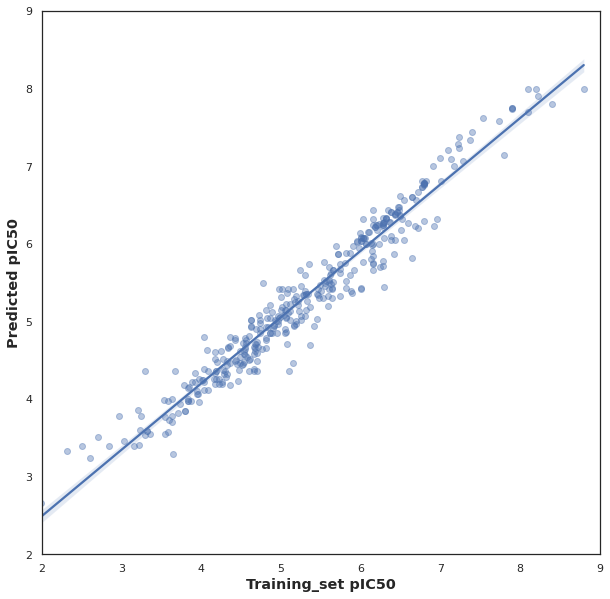

In [29]:
# scatter plot to visualize and evaluate model
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_train, Y_train_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Training_set pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(2, 9)
ax.set_ylim(2, 9)
ax.figure.set_size_inches(10, 10)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

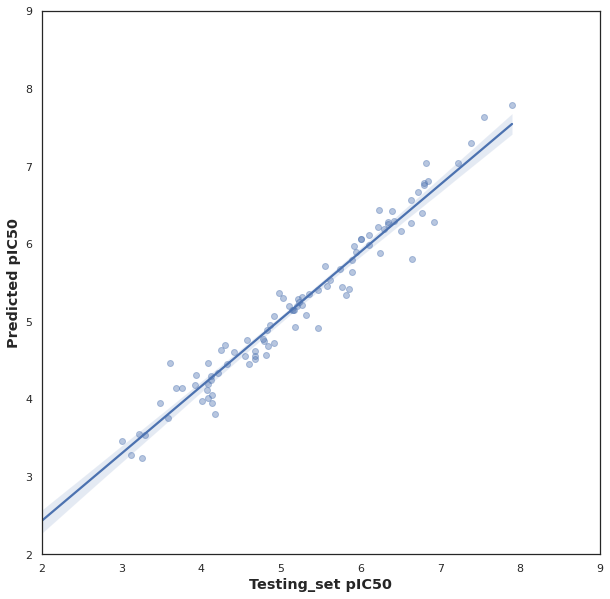

In [30]:
# scatter plot to visualize and evaluate model
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_test_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Testing_set pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(2, 9)
ax.set_ylim(2, 9)
ax.figure.set_size_inches(10, 10)
plt.show

**2.3 RF model internal validation**

In [33]:
# 10-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# evaluate model
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring='r2')

# report performance
print('r2: %.3f (%.3f)' % (mean(scores), std(scores)))


r2: 0.576 (0.147)


In [34]:
# 10-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# evaluate model
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')

# report performance
print('neg_mean_squared_error: %.3f (%.3f)' % (mean(scores), std(scores)))
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
print(rmse_scores.mean())

neg_mean_squared_error: -0.540 (0.197)
[0.73783829 0.88284474 0.65225259 0.95583997 0.65065939 0.38246897
 0.72248931 0.77539256 0.68214364 0.76054489]
0.7202474365284204


**2.4 RF model external validation**

In [31]:
#evaluation of training set

import numpy as np # linear algebra
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import missingno as msno # plotting missing data
import seaborn as sns # plotting library

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

RMSE = metrics.mean_squared_error(Y_train, Y_train_pred, squared=False)

# Printing the metrics
print('R2 square:',metrics.r2_score(Y_train, Y_train_pred))
print('RMSE: ', RMSE)

R2 square: 0.9409697908579624
RMSE:  0.281851934979308


In [32]:
#evaluation of testing set

RMSE = metrics.mean_squared_error(Y_test, Y_test_pred, squared=False)

# Printing the metrics
print('R2 square:',metrics.r2_score(Y_test, Y_test_pred))
print('RMSE: ', RMSE)

R2 square: 0.9475467658689104
RMSE:  0.27103270585510414


**2.5 Y-randomization**

In [48]:
import numpy as np
from sklearn.metrics import r2_score

#TRAINING OVER ORIGINAL TARGET
rf = RandomForestRegressor()
rf.fit(X,Y)

Y_train_pred = rf.predict(X_train)
original_r2 = r2_score(Y_train,Y_train_pred)
print(original_r2)

0.9431149655908384


In [49]:
# TRAINING OVER SHUFFLED TARGET
shuffled_r2 = []
  
for i in range(100):
    np.random.shuffle(Y)
      
    rf = RandomForestRegressor()
    rf.fit(X,Y)
      
    Y_train_pred = rf.predict(X_train)
    shuffled_r2.append(r2_score(Y_train,Y_train_pred))
  
print(shuffled_r2[:20])


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

[-0.33235318226631794, -0.422704297106441, -0.3511456308015364, -0.5100229084486523, -0.5901964828093984, -0.42170591291611825, -0.471410478001246, -0.4685236832932387, -0.4189358189253627, -0.353728824094097, -0.6066161107746226, -0.3888452273620542, -0.5527297752797165, -0.3776546557838534, -0.444340028491119, -0.41117390931409203, -0.37584704076269215, -0.49872366242374233, -0.48996058736713843, -0.5312199385081451]


[(-1.0, 1.0)]

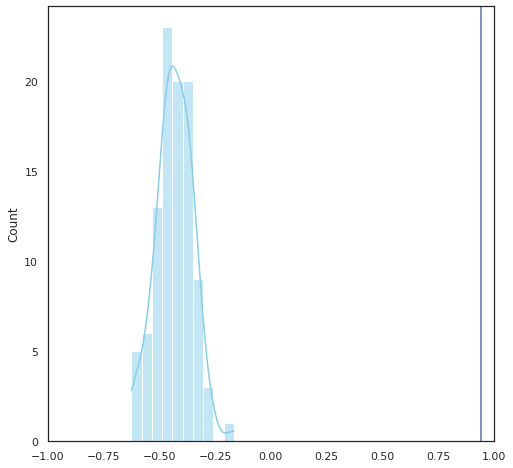

In [50]:
# Histogram plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
plt.figure(figsize = (8, 8)) 

ax = sns.histplot(data=shuffled_r2, color="skyblue", kde=True, bins = 10)
plt.axvline(original_r2)
ax.set(xlim=(-1, 1))

### **3.Feature importance**

**3.1 Mean decrease impurity**

In [38]:
plt.figure(figsize = (16, 32)) 

# get importance
importance = rf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importance
plt.barh(importance)
plt.show()

Feature: 0, Score: 0.00137
Feature: 1, Score: 0.00193
Feature: 2, Score: 0.00444
Feature: 3, Score: 0.00152
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00330
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00079
Feature: 11, Score: 0.00103
Feature: 12, Score: 0.00809
Feature: 13, Score: 0.00275
Feature: 14, Score: 0.00010
Feature: 15, Score: 0.00599
Feature: 16, Score: 0.00467
Feature: 17, Score: 0.00056
Feature: 18, Score: 0.00034
Feature: 19, Score: 0.00577
Feature: 20, Score: 0.00297
Feature: 21, Score: 0.00349
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00044
Feature: 24, Score: 0.00097
Feature: 25, Score: 0.00133
Feature: 26, Score: 0.00509
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00064
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00147
Feature: 34, Score: 0.00123
Feature: 35, Score: 0.00000
Fe

TypeError: ignored

<Figure size 1152x2304 with 0 Axes>

**3.2 Permutation importance**

In [ ]:
from sklearn.inspection import permutation_importance

# perform permutation importance
results = permutation_importance(model, X, Y, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importance
pyplot.bar([x for X in range(len(importance))], importance)
pyplot.show()

**3.3 Feature importance by shap explainer**

In [39]:
! pip install shap
import shap

     |████████████████████████████████| 371 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509233 sha256=c590db94376243d69b3c783bee9a14f35e7254c8e0884a7215ac2bae8ead6e57
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


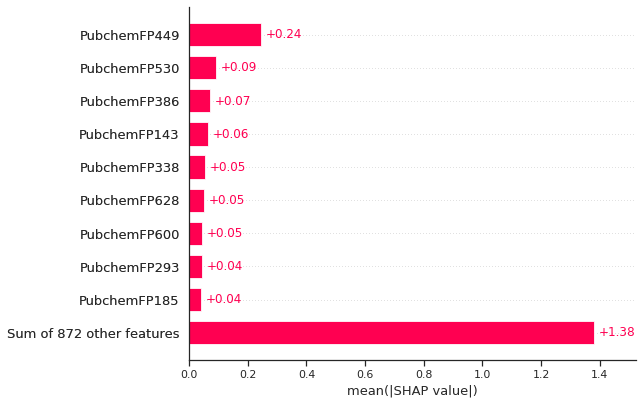

In [40]:
explainer = shap.Explainer(rf)
shap_values = explainer(X[:478])
shap.plots.bar(shap_values)

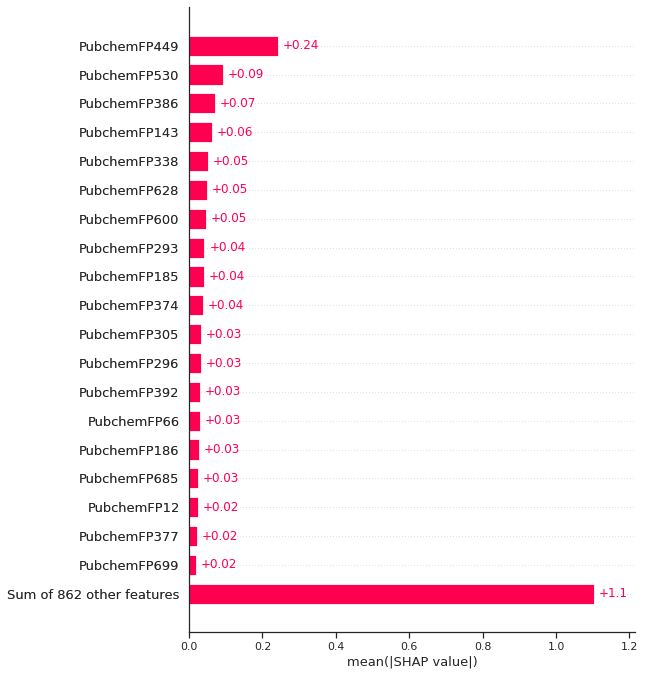

In [41]:
explainer = shap.Explainer(rf)
shap_values = explainer(X[:478])
shap.plots.bar(shap_values, max_display=20)

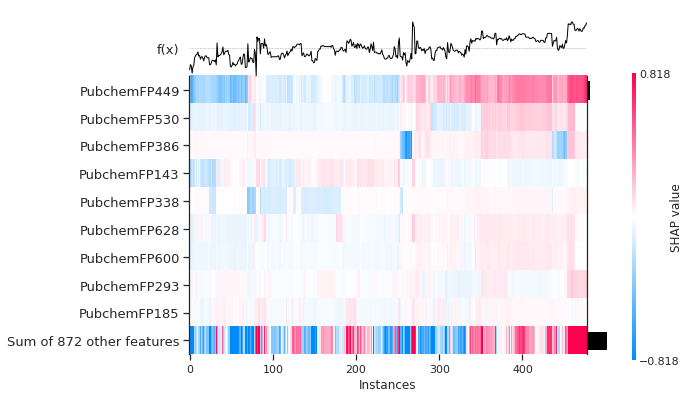

In [42]:
#global summary heatmap
shap.plots.heatmap(shap_values)

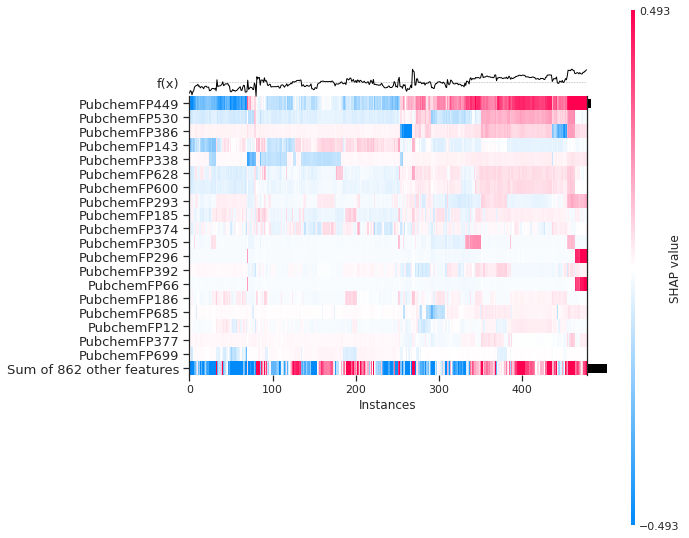

In [43]:
# top 20 ranked features and their individual contributions
shap.plots.heatmap(shap_values, max_display=20)

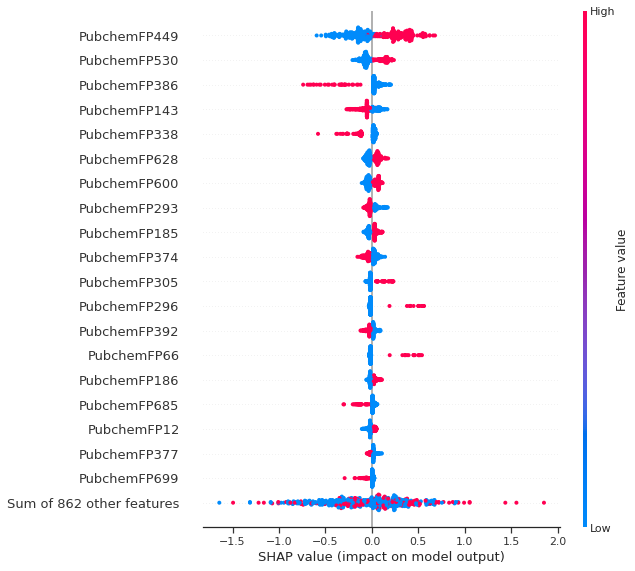

In [44]:
#beeswarm 
shap.plots.beeswarm(shap_values, max_display=20)

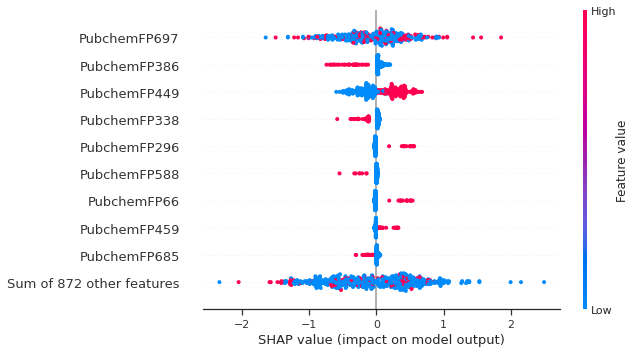

In [45]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

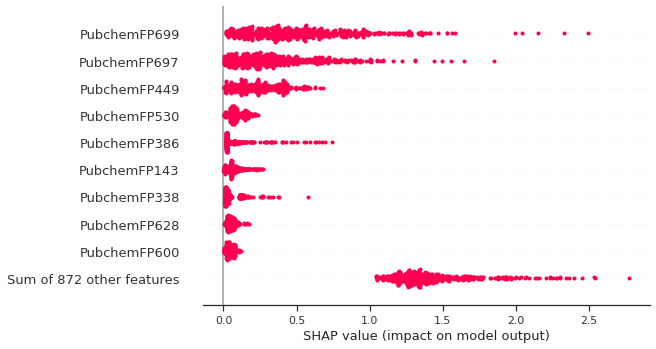

In [46]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

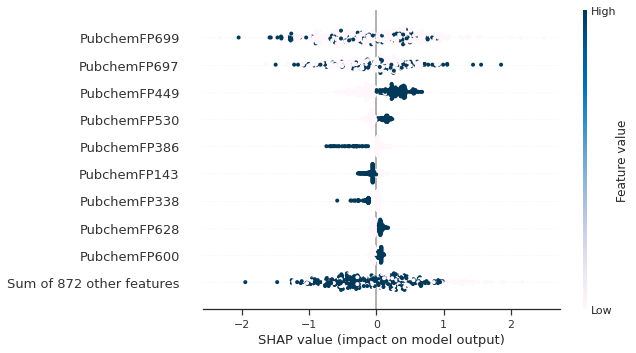

In [47]:
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values, color=plt.get_cmap("PuBu"))